In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from yellowbrick.classifier import ConfusionMatrix

In [325]:
PATH_DATABASE = "./database/adult"
DATABASE_EXTENSION = ".csv"
TARGET_NAME = "class"

In [326]:
def load_data ():
    return pd.read_csv(PATH_DATABASE + DATABASE_EXTENSION, encoding='latin-1', delimiter=',')

In [327]:
def split_features_target (db):
    return db.drop(TARGET_NAME, axis = 1), db[TARGET_NAME]

In [328]:
def encode_data (db, cols):
    le = LabelEncoder()

    for col in cols:
        db[col] = le.fit_transform(db[col])
    return db

In [329]:
def dummy_data (db, cols):
    return pd.get_dummies(db, columns = cols)

In [330]:
database = load_data()
database

,age,work-class,fnlwgt,education,edu-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-pre-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [331]:
database.dropna(axis=0, how='any', inplace=True)
database.drop(['fnlwgt','education'], axis=1, inplace=True)
features, target = split_features_target(database)
features

,age,work-class,edu-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-pre-week,native-country
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
48837,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48839,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


**Colunas para dummy e encode**

In [332]:
colsToEncode = ['sex']
colsToDummy = ['work-class', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']

**Encoding**

In [333]:
features = encode_data(features, colsToEncode)
features = dummy_data(features, colsToDummy)
features

,age,edu-num,sex,capital-gain,capital-loss,hours-pre-week,work-class_Federal-gov,work-class_Local-gov,work-class_Private,work-class_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,1,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,1,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,1,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,1,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,13,1,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48837,39,13,0,0,0,36,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48839,38,13,1,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48840,44,13,1,5455,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


**Preparando para rodar árvore**

In [334]:
x_prev = features.values
X_train, X_test, y_train, y_test = train_test_split(x_prev, target, test_size=0.2, random_state=0)

In [335]:
y_test.value_counts()

<=50K    6840
>50K     2205
Name: class, dtype: int64

In [336]:
modelo = DecisionTreeClassifier(criterion='gini', random_state=10)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [337]:
previsoes = modelo.predict(X_test)
previsoes

array(['<=50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

0.8144831398562742

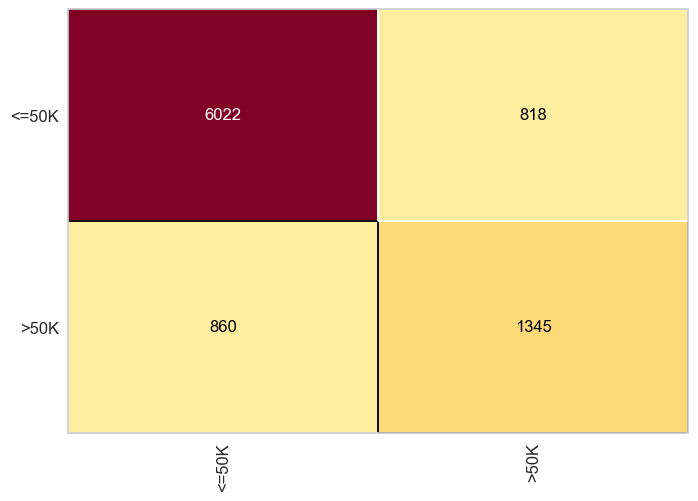

In [338]:
confusion = ConfusionMatrix(modelo)
confusion.fit(X_train, y_train)
confusion.score(X_test, y_test)

In [339]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      6840
        >50K       0.62      0.61      0.62      2205

    accuracy                           0.81      9045
   macro avg       0.75      0.75      0.75      9045
weighted avg       0.81      0.81      0.81      9045



In [340]:
modelo.classes_

array(['<=50K', '>50K'], dtype=object)

**La arvore**

[Text(0.5, 0.9, 'marital-status_Married-civ-spouse <= 0.5\ngini = 0.374\nsamples = 36177\nvalue = [27174, 9003]\nclass = MAIOR QUE 50'),
 Text(0.25, 0.7, 'capital-gain <= 7055.5\ngini = 0.127\nsamples = 19306\nvalue = [17995, 1311]\nclass = MAIOR QUE 50'),
 Text(0.125, 0.5, 'edu-num <= 12.5\ngini = 0.097\nsamples = 18946\nvalue = [17981, 965]\nclass = MAIOR QUE 50'),
 Text(0.0625, 0.3, 'capital-loss <= 2218.5\ngini = 0.048\nsamples = 15065\nvalue = [14693, 372]\nclass = MAIOR QUE 50'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'age <= 31.5\ngini = 0.259\nsamples = 3881\nvalue = [3288, 593]\nclass = MAIOR QUE 50'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'capital-gain <= 8296.0\ngini = 0.075\nsamples = 360\nvalue = [14, 346]\nclass = MENOR QUE 50'),
 Text(0.3125, 0.3, 'capital-gain <= 7436.5\ngini = 0.48\nsamples = 25\nvalue = [10, 15]\nclass = MENOR QUE 50'),
 Text(0.28125, 0.1, '

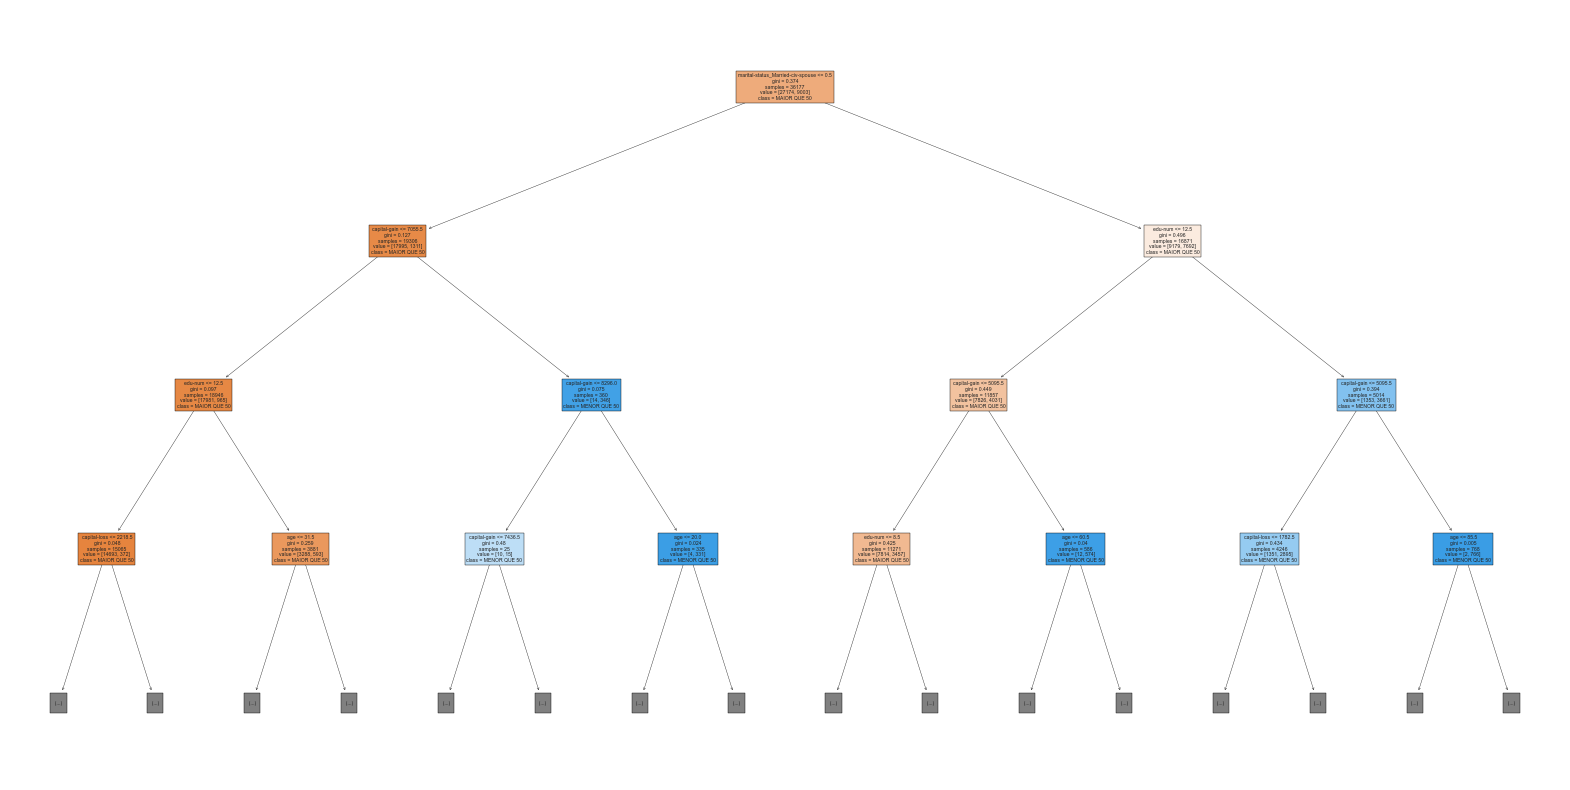

In [341]:
plt.subplots(figsize=(20, 10))
tree.plot_tree(modelo, filled=True, class_names=['MAIOR QUE 50', 'MENOR QUE 50'], feature_names=features.columns, max_depth=3)